# Drug Use and Health Project

## first plot

In [1]:
# Import required modules
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Import the data and variable categories

In [2]:
df = pd.read_csv('MyData.csv', header=0)
df_v = pd.read_csv('variable.csv', header=0)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2502) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Get the background variables

In [3]:
background = []
n = 1
for i in df_v['CODEBOOK MODULE']:
    if (i == 'COUNTY') |( i == 'DEMOGRAPHICS' )|( i == 'EDUCATION' )|( i == 'EMPLOYMENT' )| (i == 'INCOME')|(i == 'ALCOHOL'):
        background.append(df_v['VARIABLE'][n])
    n += 1
print(background)

['ALCTRY', 'ALCYFU', 'ALCMFU', 'ALCREC', 'ALCYRTOT', 'ALTOTFG', 'ALFQFLG', 'ALBSTWAY', 'ALDAYPYR', 'ALDAYPMO', 'ALDAYPWK', 'ALCDAYS', 'AL30EST', 'ALDYSFG', 'ALCUS30D', 'ALCBNG30D', 'MJEVER', 'NOMARR2', 'SERVICE', 'MILSTAT', 'ACTDEVER', 'ACTD2001', 'ACTD9001', 'ACTD7590', 'ACTDVIET', 'ACTDPRIV', 'COMBATPY', 'HEALTH', 'MOVSINPYR2', 'SEXATRACT', 'SEXIDENT', 'SPEAKENGL', 'DIFFHEAR', 'DIFFSEE', 'DIFFTHINK', 'DIFFWALK', 'DIFFDRESS', 'DIFFERAND', 'IRSEX', 'EDUSCHGRD2', 'EDUFULPAR', 'EDUSCKMON', 'EDUSCKEST', 'EDUSCKCOM', 'EDUSKPMON', 'EDUSKPEST', 'EDUSKPCOM', 'MILTFAMLY', 'MILTSPPAR', 'MILTPARNT', 'MILTCHLDR', 'MILTSIBLN', 'COLLENRLFT', 'WRKDPSTWK', 'WRKHADJOB', 'WRKDHRSWK2', 'WRK35WKUS', 'WRKRSNNOT', 'WRKRSNJOB', 'WRKEFFORT', 'WRKDPSTYR', 'WRKSELFEM', 'WRKNUMJOB2', 'WRKNJBPYR', 'WRKNJBWKS', 'WRKLASTYR2', 'WRKSICKMO', 'WRKSKIPMO', 'WRKDRGPOL', 'WRKDRGALB', 'WRKDRGEDU', 'WRKDRGHLP', 'WRKTSTALC', 'WRKTSTDRG', 'WRKTSTHIR', 'WRKTSTRDM', 'WRKTST1ST', 'WRKOKPREH', 'WRKOKRAND', 'IRWRKSTAT', 'CELLNOTC

get the new data frame with useful variable

In [4]:
df3 = pd.DataFrame()
for i in background:
    if i in df.columns.values.tolist():
        df3 = pd.concat([df3, df[i]], axis=1)
    else:
        df3 = pd.concat([df3, df[i.lower()]], axis=1)
pd.DataFrame(df3).fillna('')
print(df3) 

       alctry  alcyfu  alcmfu  alcrec  alcyrtot  altotfg  alfqflg  albstway  \
0          18    9999      99       2       240       98       98         3   
1          16    9999      99       1        60       98       98         2   
2          14    9999      99       1        52       98       98         1   
3          14    9999      99       1        15       98       98         3   
4         991    9991      91      91       991       98       98        91   
5          16    9999      99       2         4       98       98         3   
6          13    9999      99       2        10       98       98         3   
7          14    9999      99       1       104       98       98         1   
8          15    9999      99       2         2       98       98         3   
9         991    9991      91      91       991       98       98        91   
10         16    9999      99       1        52       98       98         1   
11        991    9991      91      91       991     

scale the data

In [5]:
df3_scaled = preprocessing.scale(df3.values)
df3_scaled = np.nan_to_num(df3_scaled)

Clustering

In [6]:
reduced_data = PCA(n_components=2).fit_transform(df3_scaled)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
result = kmeans.fit_predict(reduced_data)

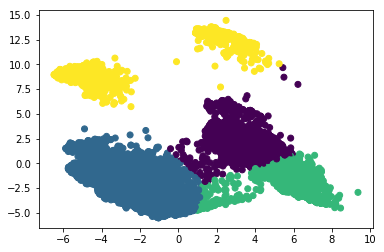

In [7]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=result)

we can find that for the half of picture (the yellow dot) is just the same class from the data. we can see this class has larger income and better education statue which is less likely to have record of alcohol abuse from the data set. For the county and demography, the influence is not as big as we imagine.  